<a href="https://colab.research.google.com/github/kilimo-africa/X-AE-A-12/blob/master/ML_Regression_%5BGradient_Descent%2C_Lasso_%26_Ridge_Regularization%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Descent ---GD---
final m is:  1.4788027175308887  and final c is:  0.03507497059521459 

Lasso Regularization ---L1---
final m is:  1.4794952303588504 final c is:  0.01515400542226122 

Ridge Regularization ---L2---
final m is:  1.4797098705519693 final c is:  0.03423810414223522 



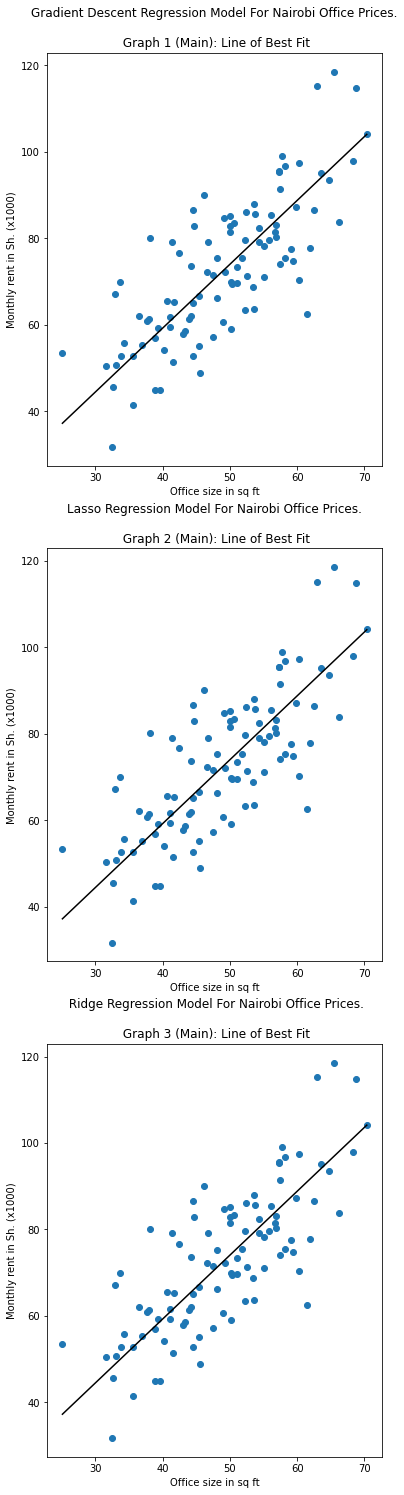

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


m=0#initial start value of gradient
c=0#initial start value of y-ntercept
L=0.0001#learning ratetry playing around with the value to see which ones converge
epoch=100#define whatever number of epochs you want but mind both efficiency and accuracy issues
epoch_error_list=[]
epoch_count_list=[]

#hyperparameter
lambda_ = 1.5

data=pd.read_csv('data.csv',header=0)

X=data['size_in_sq_ft']
Y=data['price_x1000_sh']
N=float(len(X))

def mse(N,Y,Y_hat):#the MSE function for error computation
  return (1/N)*sum(Y-Y_hat)**2

def gradient_descent_fit(m,c,N,L):#main function i.e. gradient descent to learn the line of best fit
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):#loop as many times as the epochs you want
    Y_hat = m*X+c
    #compute and arrest error for every iteration
    epoch_count_list=epoch_count_list[:]#trick the list to get its instace
    epoch_count_list.append(i)
    epoch_error=mse(N,Y,Y_hat)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)
    #minimize the error function by computing partial derivatives
    D_m=(-2/N)*sum(X*(Y-Y_hat))
    D_c=(-2/N)*sum(Y-Y_hat)
    #Apply gradient descent formular to update both m and c into new values
    m=m-(L * D_m)
    c=c-(L * D_c)
  #you can print the final m and c after all iterations are done
  print('Gradient Descent ---GD---')
  print("final m is: ",m," and final c is: ",c,"\n")
  #return final predicted value of Y-dependent variable
  return Y_hat,epoch_count_list,epoch_error_list


#call gradient descent fit function


#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()


def lasso_l1(c, N, L, lambda_):
  m = 1
  epoch_error_list = []
  epoch_count_list = []
  for i in range(epoch):
    Y_hat = m * X + c

    # compute and arrest error for every iteration
    epoch_count_list = epoch_count_list[:]  # trick the list to get its instace
    epoch_count_list.append(i)
    epoch_error = mse(N, Y, Y_hat)
    epoch_error_list = epoch_error_list[:]
    epoch_error_list.append(epoch_error)

    D_m = (-2 / N) * sum(X * (Y - Y_hat)) - (lambda_ * (m / abs(m)))  # derivative with respect to m
    D_c = (-2 / N) * sum(Y - Y_hat)  # derivative with respect to c
    m = m - (L * D_m)
    c = c - (L * D_c)

  print('Lasso Regularization ---L1---')
  print("final m is: ", m, "final c is: ", c,"\n")
  return Y_hat, m, c, epoch_error_list

#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()

#the Loss function with L2 regularisation
# w_new = w - ( 2x(wx+b-y) - 2(lambda*w) )
def ridge_l2(m, c, N, L, lambda_):
  epoch_error_list = []
  epoch_count_list = []
  for i in range(epoch):

    Y_hat = m * X + c

    # compute and arrest error for every iteration
    epoch_count_list = epoch_count_list[:]  # trick the list to get its instace
    epoch_count_list.append(i)
    epoch_error = mse(N, Y, Y_hat)
    epoch_error_list = epoch_error_list[:]
    epoch_error_list.append(epoch_error)

    #Derivative with respect to w
    D_m = (-2/N)*sum(X*(Y-Y_hat)) - (2 * lambda_ * m)
    #Derivative with respect to b
    D_c = (-2 / N) * sum(Y - Y_hat)

    m = m - (L * D_m)
    c = c - (L * D_c)

  print('Ridge Regularization ---L2---')
  print("final m is: ", m, "final c is: ", c,"\n")
  return Y_hat, m, c, epoch_error_list


returned_params=gradient_descent_fit(m,c,N,L)
y_predicted_gd=returned_params[0]
all_epoch_errors_gd=returned_params[2]

lasso_results = lasso_l1(c, N, L, lambda_)
y_predicted_l1=lasso_results[0]
all_epoch_errors_l1=lasso_results[3]

ridge_results=ridge_l2(m, c, N, L, lambda_)
y_predicted_l2=ridge_results[0]
total_epochs_l2=ridge_results[3]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, gridspec_kw={'top':5})

ax1.scatter(X, Y)
ax1.set_title('Gradient Descent Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit')
ax1.set(xlabel='Office size in sq ft', ylabel='Monthly rent in Sh. (x1000)')
ax1.plot([min(X), max(X)], [min(y_predicted_gd), max(y_predicted_gd)], color="black")

ax2.scatter(X, Y)
ax2.set_title('Lasso Regression Model For Nairobi Office Prices.\n\n Graph 2 (Main): Line of Best Fit')
ax2.set(xlabel='Office size in sq ft', ylabel='Monthly rent in Sh. (x1000)')
ax2.plot([min(X), max(X)], [min(y_predicted_l1), max(y_predicted_l1)], color="black")

ax3.scatter(X, Y)
ax3.set_title(' Ridge Regression Model For Nairobi Office Prices.\n\n Graph 3 (Main): Line of Best Fit')
ax3.set(xlabel='Office size in sq ft', ylabel='Monthly rent in Sh. (x1000)')
ax3.plot([min(X), max(X)], [min(y_predicted_l2), max(y_predicted_l2)], color="black")

plt.show()

